# 一、Pandas基础

In [1]:
import re
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1.将下面的字典创建为 DataFrame
data = {'grammer': ['Python', 'C', 'Java', np.nan, 'GO', 'SQL', 'PHP', 'Python'],
        'score': [1, 2, np.nan, 4, 5, 6, 7, 10]}
df = pd.DataFrame(data)
df

,grammer,score
0,Python,1.0
1,C,2.0
2,Java,NaN
3,NaN,4.0
4,GO,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [3]:
# 2.提取含有字符串‘Python’的行

# 方法一
res1 = df[df['grammer'] == 'Python']
# 方法二
res2 = df['grammer'].str.contains('Python')
res2.fillna(value=False, inplace=True)
df[res2]

display(res1, res2)

,grammer,score
0,Python,1.0
7,Python,10.0


0     True
1    False
2    False
3    False
4    False
5    False
6    False
7     True
Name: grammer, dtype: bool

In [4]:
# 3.输出df的所有列名
print(df.columns)

Index(['grammer', 'score'], dtype='object')


In [5]:
# 4.修改第二列列名为‘popularity’
df.rename(columns={'score': 'popularity'}, inplace=True)
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,NaN,4.0
4,GO,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [6]:
# 5.统计 grammer 列中每种编程语言出现的次数
df['grammer'].value_counts()

Python    2
Java      1
GO        1
PHP       1
C         1
SQL       1
Name: grammer, dtype: int64

In [7]:
# 6.将空值用上下值得平均值填充
df['popularity'] = df['popularity'].fillna(df['popularity'].interpolate())
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,3.0
3,NaN,4.0
4,GO,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [8]:
# 7.提取 popularity 列中值大于3的行
df[df['popularity'] > 3]

,grammer,popularity
3,NaN,4.0
4,GO,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [9]:
# 8.按照 grammer 列进行去除重复值
df.drop_duplicates(['grammer'])

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,3.0
3,NaN,4.0
4,GO,5.0
5,SQL,6.0
6,PHP,7.0


In [10]:
# 9.计算 popularity 列平均值
df['popularity'].mean()

4.75

In [11]:
# 10.将 grammer 列转换为 list
df['grammer'].to_list()

['Python', 'C', 'Java', nan, 'GO', 'SQL', 'PHP', 'Python']

In [12]:
# 11.将 DataFrame 保存为 Excel
df.to_excel('test.xlsx')

In [13]:
# 12.查看数据行列数
df.shape

(8, 2)

In [14]:
# 13.提取 popularity 列值大于3小于7的行
df[(df['popularity'] > 3) & (df['popularity'] < 7)]

,grammer,popularity
3,NaN,4.0
4,GO,5.0
5,SQL,6.0


In [15]:
# 14.交换两行位置

# 方法一
# temp = df['popularity']
# df.drop(labels=['popularity'], axis=1, inplace=True)
# df.insert(0, 'popularity', temp)
# df
# 方法二
cols = df.columns[[1, 0]]
df = df[cols]
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,NaN
4,5.0,GO
5,6.0,SQL
6,7.0,PHP
7,10.0,Python


In [16]:
# 15.提取 popularity 列最大值所在行
df[df['popularity'] == df['popularity'].max()]

,popularity,grammer
7,10.0,Python


In [17]:
# 16.查看最后5行数据
df.tail()

,popularity,grammer
3,4.0,NaN
4,5.0,GO
5,6.0,SQL
6,7.0,PHP
7,10.0,Python


In [18]:
# 17.删除最后一行数据
df.drop([len(df) - 1], inplace=True)
df

d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,NaN
4,5.0,GO
5,6.0,SQL
6,7.0,PHP


In [19]:
# 18.添加一行数据['Perl', 6.6]
row = {'grammer': 'Perl', 'popularity': 6.6}
df = df.append(row, ignore_index=True)
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,NaN
4,5.0,GO
5,6.0,SQL
6,7.0,PHP
7,6.6,Perl


In [20]:
# 19.对数据按照 “popularity" 列值的大小进行排序
df.sort_values('popularity', inplace=True)
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,NaN
4,5.0,GO
5,6.0,SQL
7,6.6,Perl
6,7.0,PHP


In [21]:
# 20.统计 grammer 列每个字符串的长度
df['grammer'] = df['grammer'].fillna('R')
df['len_str'] = df['grammer'].map(lambda x: len(x))
df

,popularity,grammer,len_str
0,1.0,Python,6
1,2.0,C,1
2,3.0,Java,4
3,4.0,R,1
4,5.0,GO,2
5,6.0,SQL,3
7,6.6,Perl,4
6,7.0,PHP,3


# 二、Pandas 数据处理

In [22]:
data = {'createTime': ['2020-03-16', '2020-03-1', '2020-03-16', '2020-03-16', '2020-03-16'],
        'education': ['本科', '本科', '不限', '专科', '专科'],
        'salary': ['20k-35k', '20k-40k', '20k-35k', '13k-20k', '10k-20k']}
df = pd.DataFrame(data)
df.to_excel('test2.xlsx')

In [23]:
# 21.读取本地 Excel 数据
df = pd.read_excel('test2.xlsx')

In [24]:
# 22.查看 df 数据前 5 行
df.head()

,Unnamed: 0,createTime,education,salary
0,0,2020-03-16,本科,20k-35k
1,1,2020-03-1,本科,20k-40k
2,2,2020-03-16,不限,20k-35k
3,3,2020-03-16,专科,13k-20k
4,4,2020-03-16,专科,10k-20k


In [25]:
# 23.将 salary 列数据转换为最大值与最小值的平均值

# 方法一
def func(df):
    L = df['salary'].split('-')
    s_min = int(L[0].strip('k'))
    s_max = int(L[1].strip('k'))
    df['salary'] = int((s_min + s_max) / 2 * 1000)
    return df


df = df.apply(func, axis=1)
df
# 方法二
# for i, r in df.iterrows():
#     nums = re.findall('\d+', row[2])
#     df.iloc[i, 2] = int(eval(f'({nums[0]} + {nums[1]}) / 2 * 1000'))

,Unnamed: 0,createTime,education,salary
0,0,2020-03-16,本科,27500
1,1,2020-03-1,本科,30000
2,2,2020-03-16,不限,27500
3,3,2020-03-16,专科,16500
4,4,2020-03-16,专科,15000


In [26]:
# 24.将数据根据学历进行分组并计算平均薪资
print(df.groupby('education').mean())

           Unnamed: 0   salary
education                     
不限                2.0  27500.0
专科                3.5  15750.0
本科                0.5  28750.0


In [27]:
# 25.将 createTime 列时间转换为月-日
from datetime import datetime
for i in range(len(df)):
    df.iloc[i, 1] = datetime.strptime(df.iloc[i, 1], '%Y-%m-%d')
    df.iloc[i, 1] = df.iloc[i, 1].to_pydatetime().strftime("%m-%d")  
df.head()

,Unnamed: 0,createTime,education,salary
0,0,03-16,本科,27500
1,1,03-01,本科,30000
2,2,03-16,不限,27500
3,3,03-16,专科,16500
4,4,03-16,专科,15000


In [28]:
# 26.查看索引、数据类型和内存信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5 non-null      int64 
 1   createTime  5 non-null      object
 2   education   5 non-null      object
 3   salary      5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes


In [29]:
# 27.查看数值型列的汇总统计
df['salary'].describe()

count        5.000000
mean     23300.000000
std       6987.488819
min      15000.000000
25%      16500.000000
50%      27500.000000
75%      27500.000000
max      30000.000000
Name: salary, dtype: float64

In [30]:
# 28.新增一列根据 salary 将数据分为三组
bins = [0, 5000, 20000, 50000]
group_names = ['低', '中', '高']
df['categories'] = pd.cut(df['salary'], bins, labels=group_names)
df

,Unnamed: 0,createTime,education,salary,categories
0,0,03-16,本科,27500,高
1,1,03-01,本科,30000,高
2,2,03-16,不限,27500,高
3,3,03-16,专科,16500,中
4,4,03-16,专科,15000,中


In [31]:
# 29.按照 salary 列对数据降序排列
df.sort_values('salary', ascending=False)

,Unnamed: 0,createTime,education,salary,categories
1,1,03-01,本科,30000,高
0,0,03-16,本科,27500,高
2,2,03-16,不限,27500,高
3,3,03-16,专科,16500,中
4,4,03-16,专科,15000,中


In [32]:
# 30.去除第 3 行数据
df.loc[3]

Unnamed: 0        3
createTime    03-16
education        专科
salary        16500
categories        中
Name: 3, dtype: object

In [33]:
# 31.计算 salary 列的中位数
np.median(df['salary'])

27500.0

<AxesSubplot:ylabel='Frequency'>

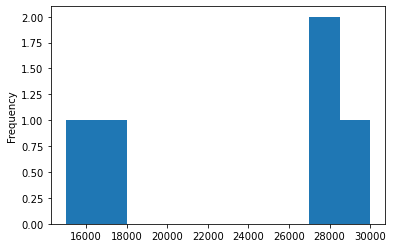

In [34]:
# 32.绘制薪资水平频率分布直方图
df.salary.plot(kind='hist')

<AxesSubplot:ylabel='Density'>

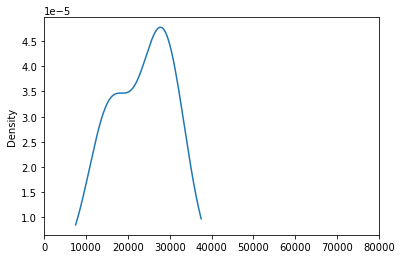

In [35]:
# 33.绘制薪资水平密度曲线
df.salary.plot(kind='kde', xlim=(0, 80000))

In [36]:
# 34.删除最后一列 categories
# del df['categories'] 等价于
df.drop(columns=['categories'], inplace=True)
df

,Unnamed: 0,createTime,education,salary
0,0,03-16,本科,27500
1,1,03-01,本科,30000
2,2,03-16,不限,27500
3,3,03-16,专科,16500
4,4,03-16,专科,15000


In [37]:
# 35.将 df 的第一列与第二列合并为新的一列
df['test'] = df['education'] + df['createTime']
df

,Unnamed: 0,createTime,education,salary,test
0,0,03-16,本科,27500,本科03-16
1,1,03-01,本科,30000,本科03-01
2,2,03-16,不限,27500,不限03-16
3,3,03-16,专科,16500,专科03-16
4,4,03-16,专科,15000,专科03-16


In [38]:
# 36.将 education 列与 salary 列合并为新的一列
df['test1'] = df['salary'].map(str) + df['education']
df

,Unnamed: 0,createTime,education,salary,test,test1
0,0,03-16,本科,27500,本科03-16,27500本科
1,1,03-01,本科,30000,本科03-01,30000本科
2,2,03-16,不限,27500,不限03-16,27500不限
3,3,03-16,专科,16500,专科03-16,16500专科
4,4,03-16,专科,15000,专科03-16,15000专科


In [39]:
# 37.计算 salary 最大值与最小值之差
df[['salary']].apply(lambda x: x.max() - x.min())

salary    15000
dtype: int64

In [40]:
# 38.将第一行与最后一行拼接，成一个新表
pd.concat([df[:1], df[-2: -1]])

,Unnamed: 0,createTime,education,salary,test,test1
0,0,03-16,本科,27500,本科03-16,27500本科
3,3,03-16,专科,16500,专科03-16,16500专科


In [41]:
# 39.将第2行数据添加至末尾
df.append(df.iloc[2])

,Unnamed: 0,createTime,education,salary,test,test1
0,0,03-16,本科,27500,本科03-16,27500本科
1,1,03-01,本科,30000,本科03-01,30000本科
2,2,03-16,不限,27500,不限03-16,27500不限
3,3,03-16,专科,16500,专科03-16,16500专科
4,4,03-16,专科,15000,专科03-16,15000专科
2,2,03-16,不限,27500,不限03-16,27500不限


In [42]:
# 40.查看每列的数据类型
df.dtypes

Unnamed: 0     int64
createTime    object
education     object
salary         int64
test          object
test1         object
dtype: object

In [43]:
# 41.将 createTime 列设置为索引
df.set_index('createTime')

,Unnamed: 0,education,salary,test,test1
createTime,,,,,
03-16,0,本科,27500,本科03-16,27500本科
03-01,1,本科,30000,本科03-01,30000本科
03-16,2,不限,27500,不限03-16,27500不限
03-16,3,专科,16500,专科03-16,16500专科
03-16,4,专科,15000,专科03-16,15000专科


In [44]:
# 42.生成一个和df长度相同的随机数dataframe
df1 = pd.DataFrame(pd.Series(np.random.randint(1, 10, 5)))
df1

,0
0,3
1,4
2,3
3,9
4,7


In [45]:
# 43.将上一题生成的 dataframe 与 df 合并
df = pd.concat([df, df1], axis=1)
df

,Unnamed: 0,createTime,education,salary,test,test1,0
0,0,03-16,本科,27500,本科03-16,27500本科,3
1,1,03-01,本科,30000,本科03-01,30000本科,4
2,2,03-16,不限,27500,不限03-16,27500不限,3
3,3,03-16,专科,16500,专科03-16,16500专科,9
4,4,03-16,专科,15000,专科03-16,15000专科,7


In [46]:
# 44.生成新的一列 new 为 salary 列减去之前生成随机数列
df['new'] = df['salary'] - df[0]
df

,Unnamed: 0,createTime,education,salary,test,test1,0,new
0,0,03-16,本科,27500,本科03-16,27500本科,3,27497
1,1,03-01,本科,30000,本科03-01,30000本科,4,29996
2,2,03-16,不限,27500,不限03-16,27500不限,3,27497
3,3,03-16,专科,16500,专科03-16,16500专科,9,16491
4,4,03-16,专科,15000,专科03-16,15000专科,7,14993


In [47]:
# 45.检查数据中是否含有任何缺省值
df.isnull().values.any()

False

In [48]:
# 46.将 salary 列类型转换为浮点数
df['salary'].astype(np.float64)

0    27500.0
1    30000.0
2    27500.0
3    16500.0
4    15000.0
Name: salary, dtype: float64

In [49]:
# 47.计算 salary 大于 20000 的次数
len(df[df['salary'] > 20000])

3

In [50]:
# 48.查看每种学历出现的次数
df.education.value_counts()

本科    2
专科    2
不限    1
Name: education, dtype: int64

In [51]:
# 49.查看 education 列共有几种学历
df['education'].nunique()

3

In [52]:
# 50.提取 salary 与 new 列的和大于 60000 的最后 3 行
df1 = df[['salary', 'new']]
rowsums = df1.apply(np.sum, axis=1)
res = df.iloc[np.where(rowsums > 30000)[0][-3:], :]
res

,Unnamed: 0,createTime,education,salary,test,test1,0,new
1,1,03-01,本科,30000,本科03-01,30000本科,4,29996
2,2,03-16,不限,27500,不限03-16,27500不限,3,27497
3,3,03-16,专科,16500,专科03-16,16500专科,9,16491


# 三、金融数据处理 

In [53]:
# 51.使用绝对路径读取本地 Excel 数据
data = pd.read_excel('600000.xls')

In [54]:
# 52.查看数据前三行
data.head(3)

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
0,2020-07-29,'600000,浦发银行,10.51,10.54,10.32,10.35,10.39,0.12,1.1550,0.1610,45256602,474093213,308490802735,295370996341
1,2020-07-28,'600000,浦发银行,10.39,10.54,10.35,10.46,10.37,0.02,0.1929,0.1160,32599274,339999711,304968548089,291998539675
2,2020-07-27,'600000,浦发银行,10.37,10.55,10.32,10.55,10.42,-0.05,-0.4798,0.1589,44655910,465608566,304381505648,291436463564


In [55]:
# 53.查看每列数据缺失值情况
data.isnull().sum()

日期      0
股票代码    0
名称      0
收盘价     0
最高价     0
最低价     0
开盘价     0
前收盘     0
涨跌额     0
涨跌幅     0
换手率     0
成交量     0
成交金额    0
总市值     0
流通市值    0
dtype: int64

In [56]:
# 54.提取日期列含有空值的行
data[data['日期'].isnull()]

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值


In [57]:
# 55.输出每列缺失值具体行数
for col in data.columns:
    if data[col].count() != len(data):
        loc = data[col][data[col].isnull().values == True].index.tolist()
        print('列名："{}"，第{}行位置有缺失值'.format(col, loc))

In [58]:
# 56.删除所有存在缺失值的行
data.dropna(axis=0, how='any', inplace=True)

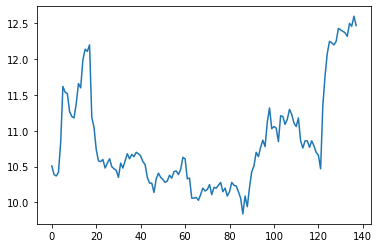

In [59]:
# 57.绘制收盘价的折线图

# plt.style.use('seaborn-darkgrid')
# plt.rc('font', size=6)
# plt.rc('figure', figsize=(4, 3), dpi=150)
# data['收盘价（元）'].plot()
# 等价于
plt.plot(data['收盘价'])

<AxesSubplot:>

d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30424 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25910 miss

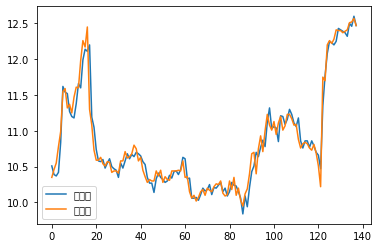

In [60]:
# 58.同时绘制开盘价与收盘价
data[['收盘价', '开盘价']].plot()

<AxesSubplot:>

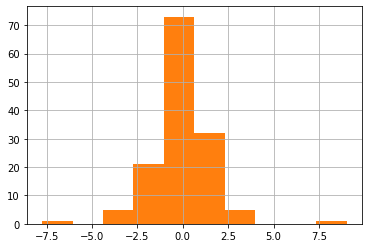

In [61]:
# 59.绘制涨跌幅的直方图
plt.hist(data['涨跌幅'])
# 等价于
data['涨跌幅'].hist()

<AxesSubplot:>

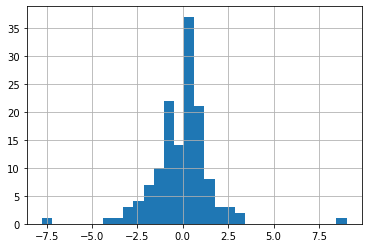

In [62]:
# 60.让直方图更细致
data['涨跌幅'].hist(bins=30)

In [63]:
# 61.以 data 的列名创建一个 dataframe
temp = pd.DataFrame(columns=data.columns.to_list())
temp

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值


In [64]:
# 62.打印所有换手率不是数字的行
for i in range(len(data)):
    if type(data.iloc[i, 10]) != np.float64:
        temp = temp.append(data.loc[i])
temp

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值


In [65]:
# 63.打印所有换手率为 -- 的行
data[data['换手率'].isin(['--'])]

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值


In [66]:
# 64.重置 data 的行号
data = data.reset_index()
data

,index,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
0,0,2020-07-29,'600000,浦发银行,10.51,10.54,10.32,10.35,10.39,0.12,1.1550,0.1610,45256602,474093213,308490802735,295370996341
1,1,2020-07-28,'600000,浦发银行,10.39,10.54,10.35,10.46,10.37,0.02,0.1929,0.1160,32599274,339999711,304968548089,291998539675
2,2,2020-07-27,'600000,浦发银行,10.37,10.55,10.32,10.55,10.42,-0.05,-0.4798,0.1589,44655910,465608566,304381505648,291436463564
3,3,2020-07-24,'600000,浦发银行,10.42,10.80,10.40,10.78,10.84,-0.42,-3.8745,0.2593,72886391,769923511,305849111751,292841653841
4,4,2020-07-23,'600000,XD浦发银,10.84,10.99,10.61,10.99,11.02,-0.18,-1.6334,0.3089,86806896,937319747,318177003011,304645252173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,133,2020-01-08,'600000,浦发银行,12.32,12.45,12.25,12.41,12.50,-0.18,-1.4400,0.1254,35240536,434980266,361617630491,346238371236
134,134,2020-01-07,'600000,浦发银行,12.50,12.60,12.46,12.51,12.46,0.04,0.3210,0.1011,28421482,355811756,366901004962,351297048738
135,135,2020-01-06,'600000,浦发银行,12.46,12.65,12.42,12.52,12.60,-0.14,-1.1111,0.1459,41001193,514432551,365726921747,350172898182
136,136,2020-01-03,'600000,浦发银行,12.60,12.63,12.47,12.57,12.47,0.13,1.0425,0.1353,38018810,477053357,369836213002,354107425127


In [67]:
# 65.删除所有换手率为非数字的行
k = []
for i in range(len(data)):
    if type(data.iloc[i, 10]) != np.float64:
        k.append(i)
data.drop(labels=k, inplace=True)

<AxesSubplot:ylabel='Density'>

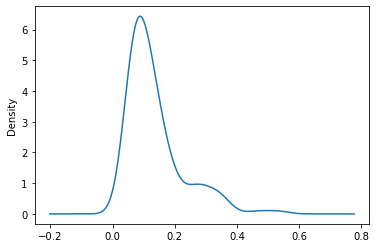

In [68]:
# 66.绘制换手率的密度曲线
data['换手率'].plot(kind='kde')

In [69]:
# 67.计算前一天与后一天收盘价的差值
data['收盘价'].diff()

0       NaN
1     -0.12
2     -0.02
3      0.05
4      0.42
       ... 
133   -0.05
134    0.18
135   -0.04
136    0.14
137   -0.13
Name: 收盘价, Length: 138, dtype: float64

In [70]:
# 68.计算前一天与后一天收盘价变化率
data['收盘价'].pct_change()

0           NaN
1     -0.011418
2     -0.001925
3      0.004822
4      0.040307
         ...   
133   -0.004042
134    0.014610
135   -0.003200
136    0.011236
137   -0.010317
Name: 收盘价, Length: 138, dtype: float64

In [71]:
# 69.设置日期为索引
data = data.set_index('日期')
data

,index,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
日期,,,,,,,,,,,,,,,
2020-07-29,0,'600000,浦发银行,10.51,10.54,10.32,10.35,10.39,0.12,1.1550,0.1610,45256602,474093213,308490802735,295370996341
2020-07-28,1,'600000,浦发银行,10.39,10.54,10.35,10.46,10.37,0.02,0.1929,0.1160,32599274,339999711,304968548089,291998539675
2020-07-27,2,'600000,浦发银行,10.37,10.55,10.32,10.55,10.42,-0.05,-0.4798,0.1589,44655910,465608566,304381505648,291436463564
2020-07-24,3,'600000,浦发银行,10.42,10.80,10.40,10.78,10.84,-0.42,-3.8745,0.2593,72886391,769923511,305849111751,292841653841
2020-07-23,4,'600000,XD浦发银,10.84,10.99,10.61,10.99,11.02,-0.18,-1.6334,0.3089,86806896,937319747,318177003011,304645252173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-08,133,'600000,浦发银行,12.32,12.45,12.25,12.41,12.50,-0.18,-1.4400,0.1254,35240536,434980266,361617630491,346238371236
2020-01-07,134,'600000,浦发银行,12.50,12.60,12.46,12.51,12.46,0.04,0.3210,0.1011,28421482,355811756,366901004962,351297048738
2020-01-06,135,'600000,浦发银行,12.46,12.65,12.42,12.52,12.60,-0.14,-1.1111,0.1459,41001193,514432551,365726921747,350172898182


In [72]:
# 70.以5个数据作为一个数据滑动窗口，在这个5个数据上取均值（收盘价）
data['收盘价'].rolling(5).mean()

日期
2020-07-29       NaN
2020-07-28       NaN
2020-07-27       NaN
2020-07-24       NaN
2020-07-23    10.506
               ...  
2020-01-08    12.384
2020-01-07    12.398
2020-01-06    12.408
2020-01-03    12.450
2020-01-02    12.470
Name: 收盘价, Length: 138, dtype: float64

In [73]:
# 71.以5个数据作为一个数据滑动窗口，计算这5个数据总和（收盘价）
data['收盘价'].rolling(5).sum()

日期
2020-07-29      NaN
2020-07-28      NaN
2020-07-27      NaN
2020-07-24      NaN
2020-07-23    52.53
              ...  
2020-01-08    61.92
2020-01-07    61.99
2020-01-06    62.04
2020-01-03    62.25
2020-01-02    62.35
Name: 收盘价, Length: 138, dtype: float64

d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='日期'>

d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


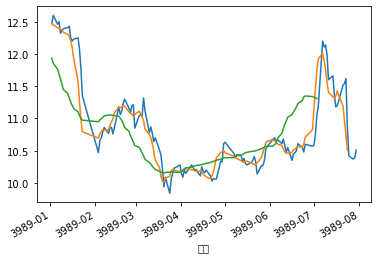

In [74]:
# 72.将收盘价5日均线、20日均线与原始数据绘制在同一个图上
data['收盘价'].plot()
data['收盘价'].rolling(5).mean().plot()
data['收盘价'].rolling(20).mean().plot()

In [75]:
# 73.按周为采样规则，取一周收盘价最大值
data['收盘价'].resample('W').max()

日期
2020-01-05    12.60
2020-01-12    12.50
2020-01-19    12.43
2020-01-26    12.25
2020-02-02      NaN
2020-02-09    10.86
2020-02-16    10.86
2020-02-23    11.30
2020-03-01    11.21
2020-03-08    11.32
2020-03-15    10.87
2020-03-22    10.51
2020-03-29    10.24
2020-04-05    10.28
2020-04-12    10.28
2020-04-19    10.25
2020-04-26    10.11
2020-05-03    10.63
2020-05-10    10.46
2020-05-17    10.43
2020-05-24    10.41
2020-05-31    10.57
2020-06-07    10.70
2020-06-14    10.68
2020-06-21    10.61
2020-06-28    10.60
2020-07-05    11.19
2020-07-12    12.20
2020-07-19    11.66
2020-07-26    11.62
2020-08-02    10.51
Freq: W-SUN, Name: 收盘价, dtype: float64

d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='日期'>

d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


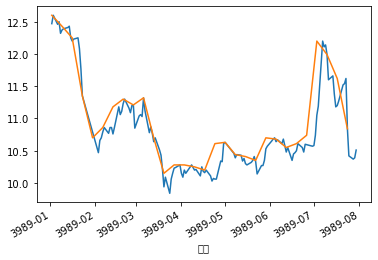

In [76]:
# 74.绘制重采样数据与原始数据
data['收盘价'].plot()
data['收盘价'].resample('7D').max().plot()

In [77]:
# 75.将数据往后移动5天
data.shift(5)

,index,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
日期,,,,,,,,,,,,,,,
2020-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-08,128.0,'600000,浦发银行,12.25,12.45,12.25,12.41,12.43,-0.18,-1.4481,0.1135,31897217.0,392531149.0,3.595630e+11,3.442711e+11
2020-01-07,129.0,'600000,浦发银行,12.43,12.69,12.39,12.40,12.41,0.02,0.1612,0.1067,29994561.0,374971640.0,3.648464e+11,3.493298e+11
2020-01-06,130.0,'600000,浦发银行,12.41,12.41,12.31,12.40,12.39,0.02,0.1614,0.0737,20715566.0,255982380.0,3.642593e+11,3.487677e+11


In [78]:
# 76.将数据向前移动5天
data.shift(-5)

,index,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
日期,,,,,,,,,,,,,,,
2020-07-29,5.0,'600000,浦发银行,11.62,11.75,11.50,11.55,11.54,0.08,0.6932,0.3512,98687637.0,1.147396e+09,3.410717e+11,3.265662e+11
2020-07-28,6.0,'600000,浦发银行,11.54,11.61,11.40,11.59,11.52,0.02,0.1736,0.1957,55004587.0,6.325768e+08,3.387235e+11,3.243179e+11
2020-07-27,7.0,'600000,浦发银行,11.52,11.57,11.27,11.32,11.27,0.25,2.2183,0.2803,78766518.0,9.012166e+08,3.381364e+11,3.237558e+11
2020-07-24,8.0,'600000,浦发银行,11.27,11.39,11.17,11.37,11.20,0.07,0.6250,0.2442,68639480.0,7.716573e+08,3.307984e+11,3.167299e+11
2020-07-23,9.0,'600000,浦发银行,11.20,11.48,11.20,11.25,11.18,0.02,0.1789,0.3438,96614162.0,1.094090e+09,3.287438e+11,3.147626e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# 77.使用 expanding 函数计算开盘价的移动窗口均值
data['开盘价'].expanding(min_periods=1).mean()

日期
2020-07-29    10.350000
2020-07-28    10.405000
2020-07-27    10.453333
2020-07-24    10.535000
2020-07-23    10.626000
                ...    
2020-01-08    10.799179
2020-01-07    10.811852
2020-01-06    10.824412
2020-01-03    10.837153
2020-01-02    10.848986
Name: 开盘价, Length: 138, dtype: float64

d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='日期'>

d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30424 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20215 miss

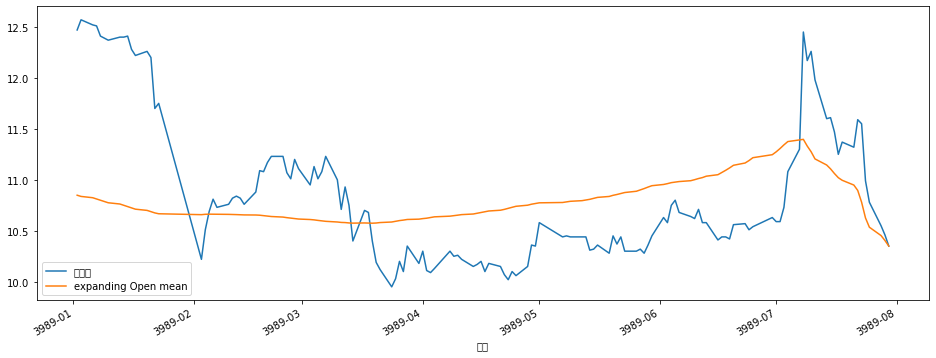

In [80]:
# 78.绘制上一题的移动均值与原始数据折线图
data['expanding Open mean'] = data['开盘价'].expanding(min_periods=1).mean()
data[['开盘价', 'expanding Open mean']].plot(figsize=(16, 6))

In [81]:
# 79.计算布林指标
data['former 30 days rolling Close mean'] = data['收盘价'].rolling(20).mean()
data['upper bound'] = data['former 30 days rolling Close mean'] + 2 * data['收盘价'].rolling(20).std()
data['lower bound'] = data['former 30 days rolling Close mean'] - 2 * data['收盘价'].rolling(20).std()

d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_

<AxesSubplot:xlabel='日期'>

d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30424 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20215 miss

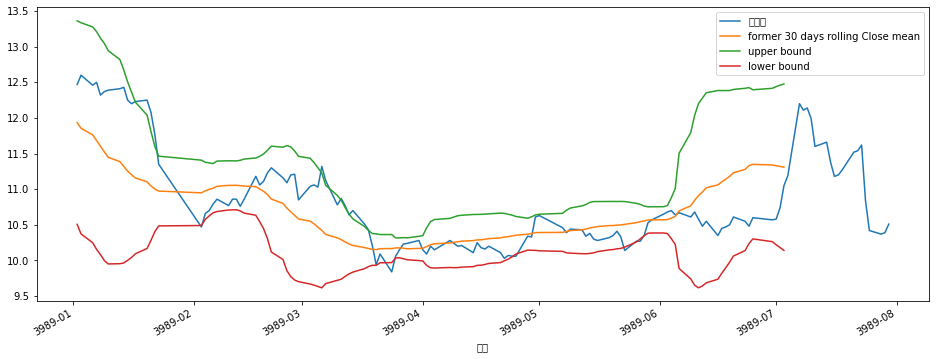

In [82]:
# 80.计算布林线并绘制
data[['收盘价', 'former 30 days rolling Close mean', 'upper bound', 'lower bound']].plot(figsize=(16, 6))

# 四、当 Pandas 遇上 NumPy

In [83]:
# 81.查看 pandas 与 numpy 版本
print(np.__version__)
print(pd.__version__)

1.19.1
1.0.5


In [84]:
# 82.从 NumPy 数组创建 DataFrame
temp = np.random.randint(1, 100, 20)
df1 = pd.DataFrame(temp)
df1

,0
0,97
1,5
2,48
3,12
4,22
5,29
6,46
7,9
8,9
9,45


In [85]:
# 83.从 NumPy 数组创建 DataFrame
temp = np.arange(0, 100, 5)
df2 = pd.DataFrame(temp)
df2

,0
0,0
1,5
2,10
3,15
4,20
5,25
6,30
7,35
8,40
9,45


In [86]:
# 84.从 NumPy 数组创建 DataFrame
temp = np.random.normal(0, 1, 20)
df3 = pd.DataFrame(temp)
df3

,0
0,0.430130
1,-0.193003
2,-0.363609
3,-0.162869
4,0.620261
5,0.018280
6,-0.203110
7,0.341586
8,0.219427
9,0.987469


In [87]:
# 85.将 df1，df2，df3 按照行合并为新 DataFrame
df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df

,0
0,97.000000
1,5.000000
2,48.000000
3,12.000000
4,22.000000
5,29.000000
6,46.000000
7,9.000000
8,9.000000
9,45.000000


In [88]:
# 86.将 df1，df2，df3 按照列合并为新 DataFrame
df = pd.concat([df1, df2, df3], axis=1, ignore_index=True)
df

,0,1,2
0,97,0,0.430130
1,5,5,-0.193003
2,48,10,-0.363609
3,12,15,-0.162869
4,22,20,0.620261
5,29,25,0.018280
6,46,30,-0.203110
7,9,35,0.341586
8,9,40,0.219427
9,45,45,0.987469


In [89]:
# 87.查看 df 所有数据的最小值、25%分位数、中位数、75%分位数、最大值
np.percentile(df, q=[0, 25, 50, 75, 100])

array([-1.66941184,  0.3190057 , 13.5       , 46.5       , 97.        ])

In [90]:
# 88.修改列名为 col1， col2， col3
df.columns = ['col1', 'col2', 'col3']

In [91]:
# 89.提取第一列中不在第二列出现的数字
df['col1'][~df['col1'].isin(df['col2'])]

0     97
2     48
3     12
4     22
5     29
6     46
7      9
8      9
11    37
13    27
14    93
15     2
16     3
17     9
18    36
19    56
Name: col1, dtype: int32

In [92]:
# 90.提取第一列和第二列出现频率最高的三个数字
temp = df['col1'].append(df['col2'])
temp.value_counts().index[:3]

Int64Index([9, 35, 45], dtype='int64')

In [93]:
# 91.提取第一列中可以整除5的数字位置
df[df['col1'] % 5 == 0]

,col1,col2,col3
1,5,5,-0.193003
9,45,45,0.987469
10,95,50,-0.835734
12,35,60,-1.669412


In [94]:
# 92.计算第一列数字前一个与后一个的差值
df['col1'].diff().tolist()

[nan,
 -92.0,
 43.0,
 -36.0,
 10.0,
 7.0,
 17.0,
 -37.0,
 0.0,
 36.0,
 50.0,
 -58.0,
 -2.0,
 -8.0,
 66.0,
 -91.0,
 1.0,
 6.0,
 27.0,
 20.0]

In [95]:
# 93.将 col1，col2，col3 三列顺序颠倒
df.iloc[:, ::-1]

,col3,col2,col1
0,0.430130,0,97
1,-0.193003,5,5
2,-0.363609,10,48
3,-0.162869,15,12
4,0.620261,20,22
5,0.018280,25,29
6,-0.203110,30,46
7,0.341586,35,9
8,0.219427,40,9
9,0.987469,45,45


In [96]:
# 94.提取第一列位置在1，10，15的数字
df['col1'].take([1, 10, 15])
# 等价于
df.iloc[[1, 10, 15], 0]

1      5
10    95
15     2
Name: col1, dtype: int32

In [97]:
# 95.查找第一列的局部最大值位置
temp = np.diff(np.sign(np.diff(df['col1'])))
np.where(temp == -2)[0] + 1

array([ 2,  6, 10, 14], dtype=int64)

In [98]:
# 96.按行计算 df 的每一行均值
df[['col1', 'col2', 'col3']].mean(axis=1)

0     32.476710
1      3.268999
2     19.212130
3      8.945710
4     14.206754
5     18.006093
6     25.265630
7     14.780529
8     16.406476
9     30.329156
10    48.054755
11    31.244100
12    31.110196
13    30.148171
14    54.417088
15    25.303205
16    27.563633
17    31.187773
18    41.902626
19    50.523469
dtype: float64

In [99]:
# 97.对第二列计算移动平均值
np.convolve(df['col2'], np.ones(3) / 3, mode='valid')

array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65.,
       70., 75., 80., 85., 90.])

In [100]:
# 98.将数据按照第三列值得大小升序排列
df.sort_values('col3', inplace=True)

In [101]:
# 99.将第一列大于50的数字修改’高‘
df.col1[df['col1'] > 50] = '高'

d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [102]:
# 100.计算第二列与第三列之间的欧式距离
np.linalg.norm(df['col2'] - df['col3'])

249.24857947448496

# 五、一些补充

In [103]:
# 101.从 csv 文件中读取指定数据
df = pd.read_csv('数据1.csv', encoding='gbk', usecols=['positionName', 'salary'], nrows=10)
df

,positionName,salary
0,数据分析,37500
1,数据建模,15000
2,数据分析,3500
3,数据分析,45000
4,数据分析,30000
5,数据分析,50000
6,数据分析,30000
7,数据建模工程师,35000
8,数据分析专家,60000
9,数据分析师,40000


In [104]:
# 102.从csv文件中读取指定数据
df = pd.read_csv('数据2.csv', encoding='gbk', converters={'薪资水平': lambda x: '高' if float(x) > 10000 else '低'})
df

,学历要求,薪资水平,Unnamed: 2
0,本科,高,NaN
1,硕士,高,NaN
2,本科,低,NaN
3,本科,高,NaN
4,不限,高,NaN
...,...,...,...
1149,硕士,高,NaN
1150,本科,高,NaN
1151,本科,高,NaN
1152,本科,高,NaN


In [105]:
# 103.从上一题数据中，对薪资水平列每隔20行进行一次抽样
df.iloc[::20, :][['薪资水平']]

,薪资水平
0,高
20,高
40,高
60,高
80,高
100,高
120,高
140,高
160,高
180,高


In [106]:
# 104.将数据取消使用科学计数法
df = pd.DataFrame(np.random.random(10) ** 10, columns=['data'])
df

,data
0,2.659006e-06
1,1.034524e-06
2,7.774663e-04
3,1.904049e-09
4,4.762328e-03
5,4.617843e-05
6,1.116164e-05
7,1.601685e-04
8,6.743840e-06
9,4.186928e-05


In [107]:
# 105.将上一题的数据转换为百分数
df.style.format({'data': '{0:.2%}'.format})

,data
0,0.00%
1,0.00%
2,0.08%
3,0.00%
4,0.48%
5,0.00%
6,0.00%
7,0.02%
8,0.00%
9,0.00%


In [108]:
# 106.查找上一题数据中第3大值得行号
df['data'].argsort()[::-1][7]

7

In [109]:
# 107.反转 df 的行
df.iloc[::-1, :]

,data
9,4.186928e-05
8,6.743840e-06
7,1.601685e-04
6,1.116164e-05
5,4.617843e-05
4,4.762328e-03
3,1.904049e-09
2,7.774663e-04
1,1.034524e-06
0,2.659006e-06


In [110]:
# 108.按照多列对数据进行合并
df1 = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                    'key2': ['K0', 'K1', 'K0', 'K1'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})

df2 = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                    'key2': ['K0', 'K0', 'K0', 'K0'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']})

pd.merge(df1, df2, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [111]:
# 109.按照多列对数据进行合并
pd.merge(df1, df2, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [112]:
# 110.再次读取数据1并显示所有的列
df = pd.read_csv('数据1.csv', encoding='gbk')
pd.set_option('display.max.columns', None)
df

,positionId,positionName,companyId,companyLogo,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,skillLables,positionLables,industryLables,createTime,formatCreateTime,district,businessZones,salary,workYear,jobNature,education,positionAdvantage,imState,lastLogin,publisherId,approve,subwayline,stationname,linestaion,latitude,longitude,hitags,resumeProcessRate,resumeProcessDay,score,newScore,matchScore,matchScoreExplain,query,explain,isSchoolJob,adWord,plus,pcShow,appShow,deliver,gradeDescription,promotionScoreExplain,isHotHire,count,aggregatePositionIds,famousCompany,Unnamed: 53
0,6802721,数据分析,475770,i/image2/M01/B7/3E/CgoB5lwPfEaAdn8WAABWQ0Jgl5s...,50-150人,"移动互联网,电商",A轮,"['绩效奖金', '带薪年假', '定期体检', '弹性工作']",产品|需求|项目类,数据分析,数据分析,"['SQL', '数据库', '数据运营', 'BI']","['电商', '社交', 'SQL', '数据库', '数据运营', 'BI']","['电商', '社交', 'SQL', '数据库', '数据运营', 'BI']",2020/3/16 11:00,11:00发布,余杭区,['仓前'],37500,1-3年,全职,本科,五险一金、弹性工作、带薪年假、年度体检,today,2020/3/16 11:00,12022406,1,NaN,NaN,NaN,30.278421,120.005922,NaN,50,1,233,0,15.101875,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
1,5204912,数据建模,50735,image1/M00/00/85/CgYXBlTUXeeAR0IjAABbroUk-dw97...,150-500人,电商,B轮,"['年终奖金', '做五休二', '六险一金', '子女福利']",开发|测试|运维类,数据开发,建模,"['算法', '数据架构']","['算法', '数据架构']",[],2020/3/16 11:08,11:08发布,滨江区,"['西兴', '长河']",15000,3-5年,全职,本科,"六险一金,定期体检,丰厚年终",disabled,2020/3/16 11:08,5491688,1,NaN,NaN,NaN,30.188041,120.201179,NaN,23,1,176,0,32.559414,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
2,6877668,数据分析,100125,image2/M00/0C/57/CgqLKVYcOA2ADcFuAAAE8MukIKA74...,2000人以上,"移动互联网,企业服务",上市公司,"['节日礼物', '年底双薪', '股票期权', '带薪年假']",产品|需求|项目类,数据分析,数据分析,"['数据库', '数据分析', 'SQL']","['数据库', 'SQL']",[],2020/3/16 10:33,10:33发布,江干区,"['四季青', '钱江新城']",3500,1-3年,全职,本科,五险一金 周末双休 不加班 节日福利,today,2020/3/16 10:33,5322583,1,4号线,江锦路,4号线_城星路;4号线_市民中心;4号线_江锦路,30.241521,120.212539,NaN,11,4,80,0,14.972357,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
3,6496141,数据分析,26564,i/image2/M01/F7/3F/CgoB5lyGAQGAZeI-AAAdOqXecnw...,500-2000人,电商,D轮及以上,"['生日趴', '每月腐败基金', '每月补贴', '年度旅游']",开发|测试|运维类,数据开发,数据分析,[],['电商'],['电商'],2020/3/16 10:10,10:10发布,江干区,NaN,45000,3-5年,全职,本科,年终奖等,threeDays,2020/3/16 10:10,9814560,1,1号线,文泽路,1号线_文泽路,30.299404,120.350304,NaN,100,1,68,0,12.874153,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],True,NaN
4,6467417,数据分析,29211,i/image2/M01/77/B8/CgoB5l1WDyGATNP5AAAlY3h88SY...,2000人以上,物流丨运输,上市公司,"['技能培训', '免费班车', '专项奖金', '岗位晋升']",产品|需求|项目类,数据分析,数据分析,"['BI', '数据分析', '数据运营']","['BI', '数据运营']",[],2020/3/16 9:56,09:56发布,余杭区,['仓前'],30000,3-5年,全职,大专,五险一金,disabled,2020/3/16 9:56,6392394,1,NaN,NaN,NaN,30.282952,120.009765,NaN,20,1,66,0,12.755375,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,6884346,数据分析师,21236,i/image/M00/43/F6/CgqKkVeEh76AUVPoAAA2Bj747wU6...,500-2000人,"移动互联网,医疗丨健康",C轮,"['技能培训', '年底双薪', '节日礼物', '绩效奖金']",产品|需求|项目类,数据分析,数据分析,"['数据库', '商业', '数据分析', 'SQL']","['医疗健康', '数据库', '商业', '数据分析', 'SQL']","['医疗健康', '数据库', '商业', '数据分析', 'SQL']",2020/3/11 16:45,2020/3/11,萧山区,NaN,25000,3-5年,全职,不限,大牛老板，开放环境，民生行业，龙头公司,threeDays,2020/3/16 9:49,1665167,1,NaN,NaN,NaN,30.203078,120.247069,NaN,96,1,0,0,0.314259,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
101,6849100,商业数据分析,72076,i/image2/M01/92/A4/CgotOV2LPUmAR_8dAAB_DlDMiXA...,500-2000人,"移动互联网,电商",C轮,"['节日礼物', '股票期权', '带薪年假', '年度旅游']",市场|商务类,市场|营销,商业数据分析,"['市场', '数据分析', '行业分析', '市场分析']","['电商', '市场', '数据分析', '行业分析', '市场分析']","['电商', '市场', '数据分析', '行业分析', '市场分析']",2020/3/14 17:38,2天前发布,余杭区,NaN,35000,1-3年,全职,硕士,五险一金、带薪休假,threeDays,2020/3/14 17:38,1732416,1,NaN,NaN,NaN,30.276694,119.990918,NaN,2,3,0,0,0.283276,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
102,6803432,奔驰·耀出行-BI数据分析专家,751158,i/image3/M01/64/93/Cgq2xl48z2mAeYRoAAD6Qf_Jeq8...,150-500人,移动互联网,不需要融资,[],开发|测试|运维类,数据开发,数据分析,"['MySQL', '数据处理', '数

In [113]:
# 111.查找 secondType 与 thirdType 值相等的行号
np.where(df.secondType == df.thirdType)

(array([  0,   2,   4,   5,   6,  10,  14,  23,  25,  27,  28,  29,  30,
         33,  37,  38,  39,  40,  41,  48,  49,  52,  53,  55,  57,  61,
         65,  66,  67,  71,  73,  74,  75,  79,  80,  82,  85,  88,  89,
         91,  96, 100], dtype=int64),)

In [114]:
# 112.查找薪资大于平均薪资的第三个数据
df[df['salary'] > df['salary'].mean()].iloc[[2]]

,positionId,positionName,companyId,companyLogo,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,skillLables,positionLables,industryLables,createTime,formatCreateTime,district,businessZones,salary,workYear,jobNature,education,positionAdvantage,imState,lastLogin,publisherId,approve,subwayline,stationname,linestaion,latitude,longitude,hitags,resumeProcessRate,resumeProcessDay,score,newScore,matchScore,matchScoreExplain,query,explain,isSchoolJob,adWord,plus,pcShow,appShow,deliver,gradeDescription,promotionScoreExplain,isHotHire,count,aggregatePositionIds,famousCompany,Unnamed: 53
5,6882347,数据分析,94826,image2/M00/04/12/CgpzWlXwKIKAaJd9AAARGoomCu485...,50-150人,"移动互联网,社交",B轮,"['股票期权', '扁平管理', '五险一金', '岗位晋升']",产品|需求|项目类,数据分析,数据分析,"['BI', '可视化', '数据分析', '数据库']","['音乐', '直播', 'BI', '可视化', '数据库']","['音乐', '直播', 'BI', '可视化', '数据库']",2020/3/16 9:54,09:54发布,余杭区,NaN,50000,1-3年,全职,本科,团建 野生蹦迪 文艺咖 声音发烧友,threeDays,2020/3/16 9:54,11484869,1,NaN,NaN,NaN,30.275854,119.997073,NaN,16,1,66,0,12.718732,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN


In [115]:
# 113.将上一题数据的 salary 裂开根号
df[['salary']].apply(np.sqrt)

,salary
0,193.649167
1,122.474487
2,59.160798
3,212.132034
4,173.205081
...,...
100,158.113883
101,187.082869
102,173.205081
103,141.421356


In [116]:
# 114.将上一题数据的 linestaion 列按 _ 拆分
df['split'] = df['linestaion'].str.split('_')

In [117]:
# 115.查看上一题数据中一共有多少列
df.shape[1]

55

In [118]:
# 116.提取 industryField 列以’数据‘开头的行
df[df['industryField'].str.startswith('数据')]

,positionId,positionName,companyId,companyLogo,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,skillLables,positionLables,industryLables,createTime,formatCreateTime,district,businessZones,salary,workYear,jobNature,education,positionAdvantage,imState,lastLogin,publisherId,approve,subwayline,stationname,linestaion,latitude,longitude,hitags,resumeProcessRate,resumeProcessDay,score,newScore,matchScore,matchScoreExplain,query,explain,isSchoolJob,adWord,plus,pcShow,appShow,deliver,gradeDescription,promotionScoreExplain,isHotHire,count,aggregatePositionIds,famousCompany,Unnamed: 53,split
8,6458372,数据分析专家,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4...,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",产品|需求|项目类,数据分析,其他数据分析,"['数据分析', '数据运营']","['电商', '广告营销', '数据分析', '数据运营']","['电商', '广告营销', '数据分析', '数据运营']",2020/3/16 10:57,10:57发布,余杭区,NaN,60000,5-10年,全职,本科,六险一金、境内外旅游、带薪年假、培训发展,today,2020/3/16 9:51,7542546,1,NaN,NaN,NaN,30.281850,120.015690,NaN,83,1,24,0,1.141952,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN,NaN
10,6804629,数据分析师,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4...,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",产品|需求|项目类,数据分析,数据分析,['数据分析'],"['电商', '广告营销', '数据分析']","['电商', '广告营销', '数据分析']",2020/3/16 10:57,10:57发布,余杭区,NaN,30000,不限,全职,本科,六险一金 旅游 带薪年假 培训发展 双休,today,2020/3/16 9:51,7542546,1,NaN,NaN,NaN,30.281850,120.015690,NaN,83,1,17,0,1.161869,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN,NaN
13,6804489,资深数据分析师,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4...,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",开发|测试|运维类,数据开发,数据分析,['数据分析'],"['电商', '数据分析']","['电商', '数据分析']",2020/3/16 10:57,10:57发布,余杭区,NaN,30000,3-5年,全职,本科,六险一金 旅游 带薪年假 培训发展 双休,today,2020/3/16 9:51,7542546,1,NaN,NaN,NaN,30.281850,120.015690,NaN,83,1,16,0,1.075559,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN,NaN
21,6267370,数据分析专家,31544,image1/M00/00/48/CgYXBlTUXOaADKooAABjQoD_n1w50...,150-500人,数据服务,不需要融资,"['专业红娘牵线', '节日礼物', '技能培训', '岗位晋升']",开发|测试|运维类,数据开发,数据分析,"['数据挖掘', '数据分析']","['数据挖掘', '数据分析']",[],2020/3/16 11:16,11:16发布,滨江区,NaN,20000,5-10年,全职,本科,五险一金,today,2020/3/16 11:16,466738,1,4号线,中医药大学,4号线_中医药大学;4号线_联庄,30.185480,120.139320,NaN,43,1,7,0,1.290228,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN,"[4号线, 中医药大学;4号线, 联庄]"
32,6804489,资深数据分析师,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4...,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",开发|测试|运维类,数据开发,数据分析,['数据分析'],"['电商', '数据分析']","['电商', '数据分析']",2020/3/16 10:57,10:57发布,余杭区,NaN,37500,3-5年,全职,本科,六险一金 旅游 带薪年假 培训发展 双休,today,2020/3/16 9:51,7542546,1,NaN,NaN,NaN,30.281850,120.015690,NaN,83,1,16,0,1.075712,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN,NaN
37,6242470,数据分析师,31544,image1/M00/00/48/CgYXBlTUXOaADKooAABjQoD_n1w50...,150-500人,数据服务,不需要融资,"['专业红娘牵线', '节日礼物', '技能培训', '岗位晋升']",产品|需求|项目类,数据分析,数据分析,"['增长黑客', '数据分析', '商业']","['增长黑客', '数据分析', '商业']",[],2020/3/16 11:16,11:16发布,滨江区,NaN,22500,1-3年,全职,本科,五险一金,today,2020/3/16 11:16,466738,1,4号线,中医药大学,4号线_中医药大学;4号线_联庄,30.185480,120.139320,NaN,43,1,5,0,1.060218,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN,"[4号线, 中医药大学;4号线, 联庄]"
50,6680900,数据分析师 (MJ000250),114335,i/image2/M00/17/C2/CgoB5ln5lUuAM8oSAADO2Rz54hQ...,150-500人,数据服务,B轮,"['股票期权', '弹性工作', '领导好', '五险一金']",产品|需求|项目类,产品经理,数据分析师,"['需求分析', '数据']","['企业服务', '大数据', '需求分析', '数据']","['企业服务', '大数据', '需求分析', '数据']",2020/3/16 10:49,10:49发布,西湖区,NaN,27500,3-5年,全职,不限,阿里系创业、云计算生态、餐补、双休,today,2020/3/16 10:49,3859261,1,NaN,NaN,NaN,30.289482,120.067080,NaN,1,1,5,0,0.947202,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN,NaN
63,6680900,数据分析师 (MJ000250),114335,i/image2/M00/17/C2/CgoB5ln5lUuAM8oSAADO2Rz54hQ...,150-500人,数据服务,B轮,"['股票期权', '弹性工作', '领导好', '五险一金']",产品|需求|项目类,产品经理,数据分析师,"['需求分析', '数据']","['企业服务', '大数据', '需求分析', '数据']","['企业服务', '大数据', '需求分析', '数据']",2020/3/16 10:49,10:49发布,西湖区,NaN,27500,3-5年,全职,不限,阿里系创业、云计算生态、餐补、双休,today,2020/3/16 10:49,3859261,1,NaN,NaN,NaN,30.289482,120.067080,

In [119]:
# 117.按列制作数据透视表
pd.pivot_table(df, values=['salary', 'score'], index='positionId')

,salary,score
positionId,,
5203054,30000,4.0
5204912,15000,176.0
5269002,37500,1.0
5453691,30000,4.0
5519962,37500,14.0
...,...,...
6882983,27500,15.0
6884346,25000,0.0
6886661,37500,5.0


In [120]:
# 118.同时对 salary、score 两列进行计算
df[['salary', 'score']].agg([np.sum, np.mean, np.min])

,salary,score
sum,3.331000e+06,1335.000000
mean,3.172381e+04,12.714286
amin,3.500000e+03,0.000000


In [121]:
# 119.对 salary 求平均，对 score 列求和
df.agg({'salary': np.sum, 'score': np.mean})

salary    3.331000e+06
score     1.271429e+01
dtype: float64

In [122]:
# 120.计算并提取平均薪资最高的区
df[['district', 'salary']].groupby(by='district').mean().sort_values('salary', ascending=False).head(1)

,salary
district,
萧山区,36250.0
